## Business understanding
#### Problem statement
Develop a recommender system for exercise intensity that provides personalized recommendations on appropriate workout intensities based on individual characteristics, including age, gender, BMI, exercise duration, heart rate, calories burned, weather conditions, and desired weight goals. The goal is to guide individuals in selecting exercise intensities that optimize their fitness outcomes, taking into account their specific attributes and preferences.
#### Business context
In today's thriving fitness and wellness industry, the development of a recommender system for exercise intensity presents valuable business opportunities. Fitness centers, gyms, and personal trainers can leverage this system to offer tailored workout programs that align with individual goals, preferences, and fitness levels, ultimately attracting and retaining members. Wellness apps and platforms can integrate the recommender system to deliver personalized exercise recommendations, enhancing the user experience and setting them apart from competitors. Healthcare providers can utilize the system to promote physical activity as a means of disease prevention and management, while corporate wellness programs can leverage it to support employee well-being and productivity. By incorporating an exercise intensity recommender system, businesses can optimize workout effectiveness, increase customer satisfaction, and differentiate their offerings in a competitive market.

#### Objectives
Overall Objective: Develop a Recommender System for Personalized Exercise Intensity

1. To personalize exercise intensity recommendations. Build a recommendation system based on individual characteristics such as age, gender, body mass index (BMI), exercise duration, heart rate, calories burned, weather conditions, and desired weight goals.
2. Develop a model that can predict the optimal exercise intensity for a given individual. 
3. Identify the factors that contribute to optimal exercise intensity.
4. To develop a recommender system that can dynamically adjust exercise intensity recommendations based on changing weather conditions. The system should consider the impact of different weather conditions on workout performance and suggest appropriate exercise intensities accordingly

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("exercise_dataset.csv")
df1

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.9598505,91.89253067,96.30111546,45,Male,37,170,29.42627467,Rainy,5
1,2,Exercise 7,343.4530361,64.16509681,61.1046681,25,Male,43,142,21.28634599,Rainy,5
2,3,Exercise 4,261.2234649,70.84622352,71.76672384,20,Male,20,148,27.8995916,Cloudy,4
3,4,Exercise 5,127.1838584,79.47700756,82.98445557,33,Male,39,170,33.72955245,Sunny,10
4,5,Exercise 10,416.3183735,89.96022608,85.64317443,29,Female,34,118,23.28611341,Cloudy,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6555,6450,Exercise 4,261.10470064839626,92.53265155833654,75.07431787498139,37.0,Male,18.0,142.0,58.21298673868801,Cloudy,9.0
6556,6451,Exercise 10,238.75593125946457,91.86637940980307,79.3022659035273,39.0,Female,51.0,141.0,57.34875813488217,Sunny,NaN
6557,6452,Exercise 10,201.35357634394668,97.14505505159714,80.41948431043107,34.0,Female,20.0,146.0,42.209017930816806,Cloudy,NaN
6558,6453,Exercise 5,200.69974443411724,93.46434930605588,71.09308873103583,23.0,Male,20.0,189.0,32.79409983874228,Sunny,1.0


In [3]:
# A function to print the shape of our datasets
def print_dataset_shape(*datasets):
    """
    Prints the shape of one or more datasets (number of rows and columns).
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        print(f"Dataset {idx + 1} - Number of rows: {dataset.shape[0]}")
        print(f"Dataset {idx + 1} - Number of columns: {dataset.shape[1]}")
# print the shape of our dataset
print_dataset_shape(df1)

Dataset 1 - Number of rows: 6560
Dataset 1 - Number of columns: 12


In [4]:
# Function to display the head of our datasets
def display_data_head(df1):
    dfs = [df1.head()]
    df_names = ["data"]
    for df, name in zip(dfs, df_names): 
        print(f"\n{name}:\n")
        display(df)
# Display the head of our datasets
display_data_head(df1)


data:



,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.9598505,91.89253067,96.30111546,45,Male,37,170,29.42627467,Rainy,5
1,2,Exercise 7,343.4530361,64.16509681,61.1046681,25,Male,43,142,21.28634599,Rainy,5
2,3,Exercise 4,261.2234649,70.84622352,71.76672384,20,Male,20,148,27.8995916,Cloudy,4
3,4,Exercise 5,127.1838584,79.47700756,82.98445557,33,Male,39,170,33.72955245,Sunny,10
4,5,Exercise 10,416.3183735,89.96022608,85.64317443,29,Female,34,118,23.28611341,Cloudy,3


In [5]:
#checking info of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  6560 non-null   object
 1   Exercise            6560 non-null   object
 2   Calories Burn       6359 non-null   object
 3   Dream Weight        6355 non-null   object
 4   Actual Weight       6387 non-null   object
 5   Age                 6373 non-null   object
 6   Gender              6346 non-null   object
 7   Duration            6374 non-null   object
 8   Heart Rate          6358 non-null   object
 9   BMI                 6369 non-null   object
 10  Weather Conditions  6365 non-null   object
 11  Exercise Intensity  6337 non-null   object
dtypes: object(12)
memory usage: 615.1+ KB


In [6]:
# A function to check for duplicates in our datasets
def check_duplicates(df):
    """
    This function checks for and returns any duplicates in a given dataframe.
    """
    duplicates = df[df.duplicated()]
    if duplicates.shape[0] == 0:
        print("No duplicates found in the dataset")
    else:
        print("Duplicates found in the dataset:")
        return duplicates
# Calling for the function to check for duplicates
check_duplicates(df1)

Duplicates found in the dataset:


,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
3864,3859,Exercise 10,144.3056992,87.44282248,89.5469276,36,Male,55,178,33.38330541,Cloudy,1
3865,3860,Exercise 5,154.1131439,98.14729067,96.74513279,20,Female,22,139,32.44776394,Cloudy,7
3866,3861,Exercise 4,486.3927685,97.59895722,92.70057328,21,Female,49,160,26.60247496,Rainy,5
3867,3862,Exercise 4,264.3077311,94.94661237,96.77893592,57,Male,56,167,31.43534822,Rainy,9
3869,3864,Exercise 7,116.3604168,56.75742433,59.83340349,35,Male,22,134,29.58133002,Rainy,1


In [7]:
df1.columns

Index(['ID', 'Exercise', 'Calories Burn', 'Dream Weight', 'Actual Weight',
       'Age', 'Gender', 'Duration', 'Heart Rate', 'BMI', 'Weather Conditions',
       'Exercise Intensity'],
      dtype='object')

In [8]:
#dropping duplicates
df1.drop_duplicates(inplace=True)

In [9]:
# Calling for the function to check for duplicates
check_duplicates(df1)

No duplicates found in the dataset


## Missing Values

In [10]:
# A function to check for missing values in our dataset
def check_missing_values(data):
    # Count missing values in each column
    missing_values = data.isnull().sum()

    # Convert missing values count to percentage of total rows
    missing_percent = (missing_values / len(data)) * 100

    # Combine the missing values count and percent into a DataFrame
    missing_df = pd.concat([missing_values, missing_percent], axis=1)
    missing_df.columns = ['Missing Values', '% of Total']
# Return only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]

    return missing_df

# Check missing values in each dataset
display(check_missing_values(df1))

,Missing Values,% of Total
Calories Burn,201,3.066362
Dream Weight,205,3.127384
Actual Weight,173,2.639207
Age,187,2.852784
Gender,214,3.264683
Duration,186,2.837529
Heart Rate,202,3.081617
BMI,191,2.913806
Weather Conditions,195,2.974828
Exercise Intensity,223,3.401983


Calories Burn, Dream Weight, Actual Weight, Duration,Heart Rate,Age, BMI, contains missing values and we will fill with mean.

In [11]:
numerical_cols = ['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Duration', 'Heart Rate', 'BMI', 'Exercise Intensity']
# Convert numerical columns to numeric data type
df1[numerical_cols] = df1[numerical_cols].apply(pd.to_numeric,errors="coerce")

In [12]:
# Fill missing values with the respective column's mean
# Calories Burn, Dream Weight, Actual Weight, Duration, Heart Rate, Age, BMI, Exercise Intensity

# Calculate the mean for each column
mean_values = df1.mean()
df1['Calories Burn'].fillna(mean_values['Calories Burn'], inplace=True)
df1['Dream Weight'].fillna(mean_values['Dream Weight'], inplace=True)
df1['Actual Weight'].fillna(mean_values['Actual Weight'], inplace=True)
df1['Duration'].fillna(mean_values['Duration'], inplace=True)
df1['Heart Rate'].fillna(mean_values['Heart Rate'], inplace=True)
df1['Age'].fillna(mean_values['Age'], inplace=True)
df1['BMI'].fillna(mean_values['BMI'], inplace=True)


Gender and Weather condition will use foward fill respectively

In [13]:
df1['Gender'].ffill(inplace=True)
df1['Weather Conditions'].ffill(inplace=True)
df1['Exercise Intensity'].ffill(inplace=True)


In [14]:
# Check missing values in each dataset
display(check_missing_values(df1))

,Missing Values,% of Total


In [15]:
# Select the categoricall variables for exporation
categorical_cols = ['Exercise', 'Gender', 'Weather Conditions', 'Exercise Intensity']

def print_unique_groupings(df, categorical_cols):
    for col in categorical_cols:
        unique_groups = df[col].unique()
        print(f"Unique groupings in {col}:")
        print(unique_groups)
        print()
print_unique_groupings(df1, categorical_cols)

Unique groupings in Exercise:
['Exercise 2' 'Exercise 7' 'Exercise 4' 'Exercise 5' 'Exercise 10'
 'Exercise 1' 'Exercise 9' 'Exercise 8' 'Exercise 6' 'Exercise 3'
 'Exercise']

Unique groupings in Gender:
['Male' 'Female' '40' 'Gender']

Unique groupings in Weather Conditions:
['Rainy' 'Cloudy' 'Sunny' '6' 'Weather']

Unique groupings in Exercise Intensity:
[ 5.  4. 10.  3.  2.  1.  6.  9.  7.  8.]



In [16]:
df1.loc[df1['Gender'].isin(['40','Gender']), 'Gender'] = 'Female'
df1.loc[df1['Gender'].isin(['Female ']), 'Gender'] = 'Female'
df1.loc[df1['Gender'].isin(['Male ']), 'Gender'] = 'Male'
df1['Gender'].value_counts()

Female    3328
Male      3227
Name: Gender, dtype: int64

In [17]:
#printing unique values
print_unique_groupings(df1, categorical_cols)

Unique groupings in Exercise:
['Exercise 2' 'Exercise 7' 'Exercise 4' 'Exercise 5' 'Exercise 10'
 'Exercise 1' 'Exercise 9' 'Exercise 8' 'Exercise 6' 'Exercise 3'
 'Exercise']

Unique groupings in Gender:
['Male' 'Female']

Unique groupings in Weather Conditions:
['Rainy' 'Cloudy' 'Sunny' '6' 'Weather']

Unique groupings in Exercise Intensity:
[ 5.  4. 10.  3.  2.  1.  6.  9.  7.  8.]



In [18]:
df1.loc[df1['Weather Conditions'].isin(['6','Weather']), 'Weather Conditions'] = 'Rainy'
df1.loc[df1['Weather Conditions'].isin(['Rainy ']), 'Weather Conditions'] = 'Rainy'
df1.loc[df1['Weather Conditions'].isin(['Cloudy ']), 'Weather Conditions'] = 'Cloudy'
df1.loc[df1['Weather Conditions'].isin(['Sunny']), 'Weather Conditions'] = 'Sunny'
df1['Weather Conditions'].value_counts()

Cloudy    2320
Rainy     2263
Sunny     1972
Name: Weather Conditions, dtype: int64

In [19]:
print_unique_groupings(df1, categorical_cols)

Unique groupings in Exercise:
['Exercise 2' 'Exercise 7' 'Exercise 4' 'Exercise 5' 'Exercise 10'
 'Exercise 1' 'Exercise 9' 'Exercise 8' 'Exercise 6' 'Exercise 3'
 'Exercise']

Unique groupings in Gender:
['Male' 'Female']

Unique groupings in Weather Conditions:
['Rainy' 'Cloudy' 'Sunny']

Unique groupings in Exercise Intensity:
[ 5.  4. 10.  3.  2.  1.  6.  9.  7.  8.]



## EDA

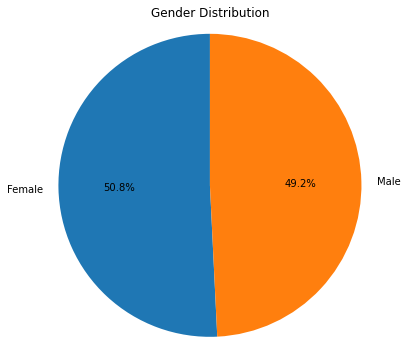

In [21]:
# Group the data by 'Gender' and get the valuecount 
gender_counts = df1['Gender'].value_counts()

#pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

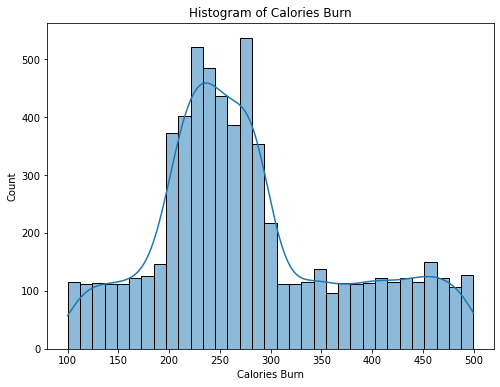

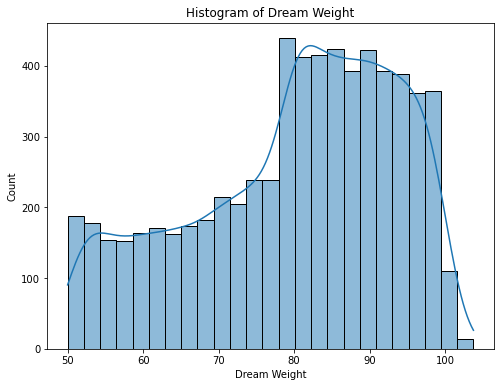

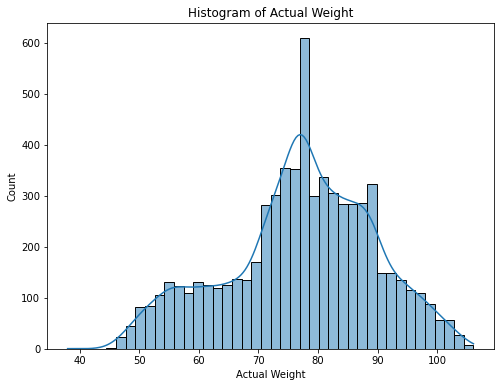

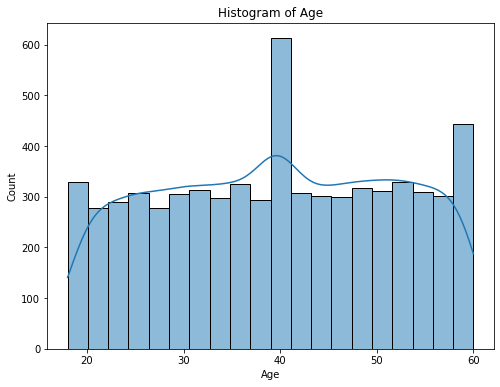

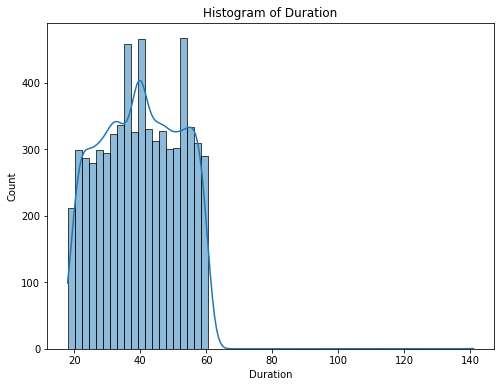

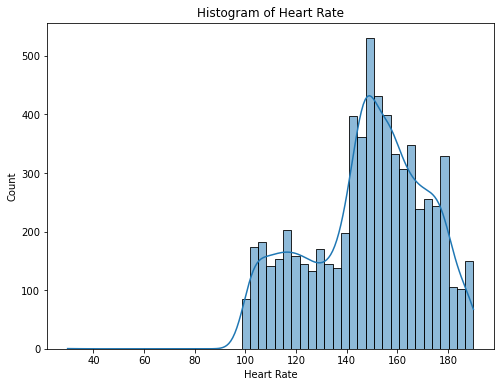

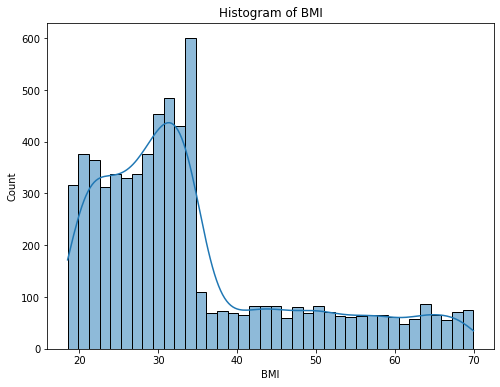

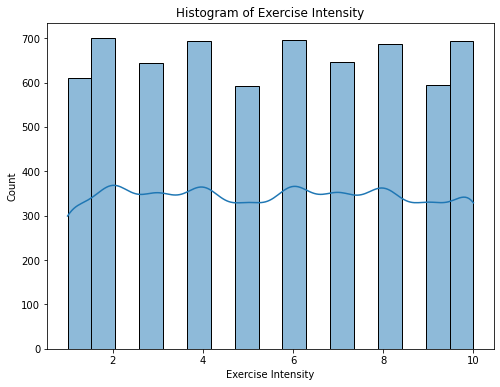

In [23]:
# Plot histogram for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df1, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [24]:
# function to plot bar plots for various variables(categorical variables)
def create_bar_plot(data, variable):
    
    # frequency Distribution of eachvariable
    variable_counts = data[variable].value_counts()
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    variable_counts.plot(kind='bar')
    plt.title(f'Frequency Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

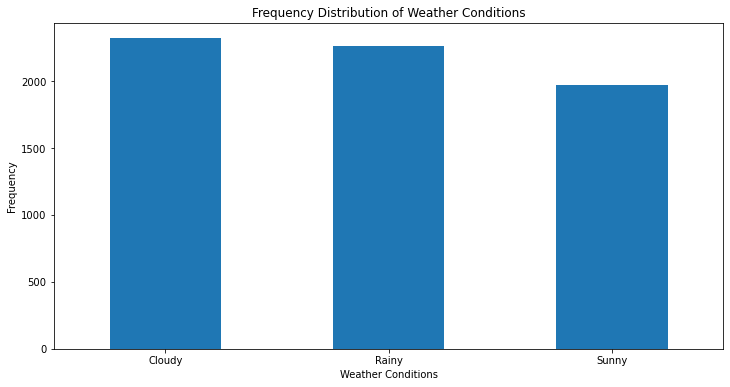

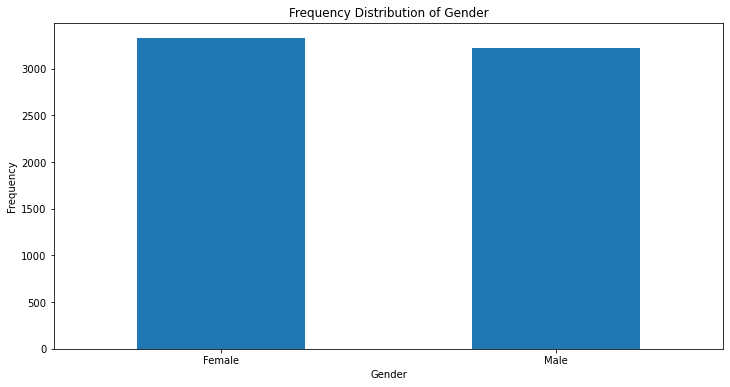

In [26]:
# bar plot for weather conditions
create_bar_plot(df1, 'Weather Conditions')
# bar plot for Gender
create_bar_plot(df1, 'Gender')